# Avocado Data Analysis Notebook
ALT-TAB LABS LLP &copy; 2020 All Rights Reserved

In [1]:
# load csvs
import pandas as pd
df_train = pd.read_csv('avocado-train.csv', index_col='id')

In [2]:
# View the data!
df_train.head()
df_train.describe()

,DataBatch,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,AveragePrice
count,12774.000000,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,12774.000000,12774.000000
mean,24.160561,8.372151e+05,2.860019e+05,2.937244e+05,2.269924e+04,2.347873e+05,1.783168e+05,5.341248e+04,3058.006595,1.407545
std,15.506127,3.456893e+06,1.254180e+06,1.221050e+06,1.109128e+05,9.815942e+05,7.427216e+05,2.421722e+05,18243.520401,0.403474
min,0.000000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.480000
25%,10.000000,1.081454e+04,8.546775e+02,2.963293e+03,0.000000e+00,5.011590e+03,2.826270e+03,1.229900e+02,0.000000,1.100000
50%,24.000000,1.069675e+05,8.640510e+03,2.893430e+04,1.803650e+02,3.922292e+04,2.589329e+04,2.603385e+03,0.000000,1.370000
75%,38.000000,4.196674e+05,1.090417e+05,1.436499e+05,6.045980e+03,1.079063e+05,8.184397e+04,2.142326e+04,113.352500,1.660000
max,52.000000,5.228870e+07,1.893304e+07,2.047057e+07,2.546439e+06,1.597249e+07,1.171281e+07,4.081398e+06,551693.650000,3.250000


In [3]:
# Clean Data

# Drops missing values 
df_train = df_train.dropna(axis=0)

# Convert strings to numbers
types = {'conventional': 0, 'organic': 1}
df_train.type = [types[x] for x in df_train.type]
regions = df_train.region.unique()
regionDict = {}
id=1
for region in regions:
    regionDict[region] = id
    id+=1
print(regionDict)
df_train.region = [regionDict[x] for x in df_train.region]

# Read more advanced ways to clean data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

{'NewOrleansMobile': 1, 'HarrisburgScranton': 2, 'Atlanta': 3, 'BuffaloRochester': 4, 'Pittsburgh': 5, 'Jacksonville': 6, 'Columbus': 7, 'Denver': 8, 'West': 9, 'DallasFtWorth': 10, 'Syracuse': 11, 'GrandRapids': 12, 'Detroit': 13, 'GreatLakes': 14, 'MiamiFtLauderdale': 15, 'SouthCentral': 16, 'NewYork': 17, 'HartfordSpringfield': 18, 'Sacramento': 19, 'Boston': 20, 'RaleighGreensboro': 21, 'TotalUS': 22, 'Roanoke': 23, 'Philadelphia': 24, 'Spokane': 25, 'LosAngeles': 26, 'Nashville': 27, 'NorthernNewEngland': 28, 'Chicago': 29, 'Houston': 30, 'Plains': 31, 'BaltimoreWashington': 32, 'CincinnatiDayton': 33, 'WestTexNewMexico': 34, 'Portland': 35, 'StLouis': 36, 'Southeast': 37, 'Seattle': 38, 'SouthCarolina': 39, 'Tampa': 40, 'California': 41, 'Northeast': 42, 'Orlando': 43, 'Charlotte': 44, 'LasVegas': 45, 'SanDiego': 46, 'Boise': 47, 'PhoenixTucson': 48, 'Albany': 49, 'RichmondNorfolk': 50, 'Indianapolis': 51, 'Louisville': 52, 'SanFrancisco': 53, 'Midsouth': 54}


In [4]:
# Select data for learning
# features = ['DataBatch','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','type','region', 'year', 'month', 'day']
features = ['DataBatch','Date','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','type', 'region']
target = 'AveragePrice'

def clean_date(x):
    return x.replace('-','')

X = df_train[features]
X['Date'] = X['Date'].apply(clean_date)
y = df_train[target]

C:\Users\alien\AppData\Local\Temp\ipykernel_3344\450733292.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = X['Date'].apply(clean_date)


In [5]:
print(len(X.columns))

11


# Regression Time!

In [72]:
# Sci Kit Learn! Scientific Computing library for python
from sklearn import *
# Pick the regression model we want to use

# Random Forest Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
model1 = ensemble.ExtraTreesRegressor(random_state=2022, n_estimators=4000, criterion='squared_error', verbose=1, n_jobs=16)  # 931
model2 = ensemble.GradientBoostingRegressor(random_state=2022, n_estimators=3000, verbose=1, criterion='squared_error')  # 9107
model3 = ensemble.RandomForestRegressor(n_estimators=3000, criterion='squared_error', n_jobs=16, verbose=1)  # 9145
model4 = ensemble.HistGradientBoostingRegressor(loss='squared_error', max_iter=5000, early_stopping=False, scoring='loss', verbose=1, categorical_features=[9, 10], max_leaf_nodes=26)  #9429

# average of model1 and 4 is 9447
# average of model1, 3 and 4 is 9393

final_model = ensemble.HistGradientBoostingRegressor(loss='squared_error', max_iter=1000, early_stopping=False, scoring='loss', verbose=1)

# model = ensemble.AdaBoostRegressor(base_estimator=model, n_estimators=10)

In [75]:
# Perform regression on the data
model1.fit(X, y)
# model2.fit(X, y)
# model3.fit(X, y)
model4.fit(X, y)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    1.7s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    2.7s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    3.9s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    5.3s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    7.0s
[Parallel(n_jobs=16)]: Done 4000 out of 4000 | elapsed:    8.9s finished


ExtraTreesRegressor(n_estimators=4000, n_jobs=16, random_state=2022, verbose=1)

In [71]:
model1.feature_importances_

array([0.071304  , 0.11226538, 0.03798972, 0.06524337, 0.05384677,
       0.03036349, 0.04355542, 0.03642318, 0.07763751, 0.38407292,
       0.08729822])

In [179]:
# Score model
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, model.predict(Xtest)) #TODO TODO TODO TODO TODO TODO TODO TODO

0.002499165795623077

# Predict for Testing data

In [8]:
df_test = pd.read_csv('avocado-test.csv', index_col='id')
# Clean Data

# Drops missing values
df_test = df_test.dropna(axis=0)

# Convert strings to numbers
types = {'conventional': 0, 'organic': 1}
df_test.type = [types[x] for x in df_test.type]
regions = df_test.region.unique()
for region in regions:
    if region not in regionDict.keys():
        regionDict[region] = 0
df_test.region = [regionDict[x] for x in df_test.region]
# Read more advanced ways to clean data
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

In [9]:
# Select features
XforPredictions = df_test[features] #TODO TODO TODO TODO TODO TODO TODO TODO
XforPredictions['Date'] = XforPredictions['Date'].apply(clean_date)
XforPredictions.head()

C:\Users\alien\AppData\Local\Temp\ipykernel_3344\3745898554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XforPredictions['Date'] = XforPredictions['Date'].apply(clean_date)


,DataBatch,Date,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,type,region
id,,,,,,,,,,,
0,21,20160731,28969.34,80.77,27361.91,0.00,1526.66,1526.66,0.00,1,29
1,19,20170820,322962.89,5632.85,242365.82,2441.56,72522.66,22942.48,46083.51,0,28
2,49,20170122,155334.45,3657.79,74068.65,0.00,77608.01,27302.29,50305.72,1,14
3,12,20151004,10231.74,341.89,8519.00,0.00,1370.85,303.33,1067.52,1,33
4,10,20151018,10652.02,6905.95,39.52,0.00,3706.55,3706.55,0.00,1,30


In [76]:
# Make Predictions!
import numpy as np
yPredictions1 = model1.predict(XforPredictions) #TODO TODO TODO TODO TODO TODO TODO TODO
yPredictions4 = model4.predict(XforPredictions) #TODO TODO TODO TODO TODO TODO TODO TODO

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 4000 out of 4000 | elapsed:    0.4s finished


Predictions: [2.012291   1.7080887  1.21093556 ... 1.58768202 1.82278366 1.58871122]


(array([  69.,  516., 1279., 1208., 1125.,  780.,  306.,  130.,   43.,
          19.]),
 array([0.46455727, 0.70897799, 0.95339872, 1.19781944, 1.44224017,
        1.68666089, 1.93108162, 2.17550234, 2.41992307, 2.66434379,
        2.90876452]),
 <BarContainer object of 10 artists>)

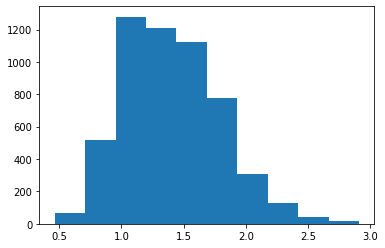

In [107]:
# Ensembling
# yPredictions = np.mean([yPredictions1, yPredictions4], axis=0)
yPredictions = yPredictions1 * 0.15 + yPredictions4 * 0.85
print("Predictions:", yPredictions)
import matplotlib.pyplot as plt
plt.hist(yPredictions)

In [108]:
# Save to CSV File!
output = pd.DataFrame({'id': XforPredictions.index, 'AveragePrice': yPredictions})
output.to_csv('avocado-submission.csv', index=False)
print(output)

        id  AveragePrice
0        0      2.012291
1        1      1.708089
2        2      1.210936
3        3      1.531254
4        4      1.528742
...    ...           ...
5470  5470      1.645487
5471  5471      1.288094
5472  5472      1.587682
5473  5473      1.822784
5474  5474      1.588711

[5475 rows x 2 columns]


# Upload for grading

In [23]:
# Download CTFSG Grader Libraries
import urllib.request, os
urllib.request.urlretrieve('https://raw.githubusercontent.com/alttablabs/ctfsg-utils/master/pyctfsglib.py', './pyctfsglib.py')
print('Downloaded pyctfsglib.py:', 'pyctfsglib.py' in os.listdir())

Downloaded pyctfsglib.py: True


In [46]:
# Connect to graders
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'C:/Users/alien/Documents/PyCharm Projects/Cyberthon 2021/pyctfsglib.py')
import pyctfsglib as ctfsg
import random

USER_TOKEN = "WrlLCkymxwtgFwRHZsdmKfSwcdqIpnqoXEtRkciVRZJfBJUgcEJoxVZjNTQRdqkR" # You need to fill this up
GRADER_URL = random.choice([
  "http://chals.cyberthon22t.ctf.sg:50101/",
  "http://chals.cyberthon22t.ctf.sg:50102/"
])

grader = ctfsg.DSGraderClient(GRADER_URL, USER_TOKEN)

DSGraderClient: Successfully Connected!
[SERVER] MOTD: CHECK your USER_TOKEN and GRADER_URL HTTP address! I'm AVOCADO_PRICE @366389bec30e


In [109]:
grader.submitFile('avocado-submission.csv')

ProofOfWork Challenge =>  ('CTFSGRB72dbc1ed6dfdb3a9f11f0dca0f62e52a', 22)
ProofOfWork Answer Found! =>  5025952


'{"challenge":{"name":"Avocado Pricing"},"id":"cl21l1y55b3ra0827ex7yqmko","status":"PARTIALLY_CORRECT","multiplier":0.9568,"submittedBy":{"username":"hci-69"},"createdAt":"2022-04-16T08:13:59Z"}'